In [8]:
%load_ext autoreload
%autoreload 2
from funlib.persistence import open_ds
import matplotlib.pyplot as plt
import numpy as np
import gunpowder as gp
import torch
from src.datasets import Kh2015, TorchZarrDataloader
from src.transforms import PreprocessingPipeline
from src.datasets.utils import multisample_collate as collate
from src.config import read_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
input_shape = (36, 212, 212)
output_shape = (12, 120, 120)

dataset = Kh2015(
  transform=read_config("examples/no_augments")["pipeline"],
  input_shape=input_shape,
  output_shape=output_shape,
)

dataloader = torch.utils.data.DataLoader(
  dataset,
  batch_size=4,
  collate_fn=collate,
  num_workers=5,
  prefetch_factor=4,
)

it = iter(dataloader)
raw, *_ = next(it)
raw.shape

Dataset not found on disk, downloading...


(4, 1, 36, 212, 212)

(4, 1, 36, 212, 212) (4, 12, 120, 120) (4, 3, 12, 120, 120) (4, 3, 12, 120, 120)


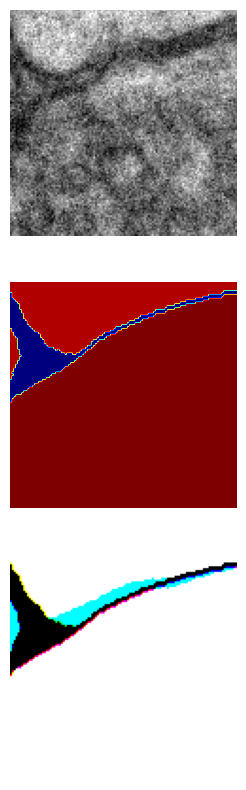

In [5]:
sample, labels, affs, affs_weights = next(it)

sample, labels, affs, affs_weights = sample[0][0], labels[0], affs[0], affs_weights[0]
start_end =  (212-120)//2
sample = sample[18,start_end:-start_end,start_end:-start_end]
labels = labels[6]
affs = affs[:,6,:,:].transpose(1, 2, 0).astype(np.float32)
#print(affs)
# show 2 images both sample and labels
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
ax[0].axis("off")
ax[0].imshow(sample, cmap="gray")
ax[1].axis("off")
ax[1].imshow(labels, cmap="jet")
ax[2].axis("off")
ax[2].imshow(affs)
plt.show()